In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\house_price_Dống-Da_Hà-Nội_subdata.csv")

In [3]:
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [6]:
df.isna().sum()

area                   6
price                 54
postDate               0
land_certificate     302
house_direction      629
balcony_direction    647
toilet               431
bedroom              351
floor                305
lat                    0
long                   0
property_type          0
dtype: int64

# Giữa giá nhà và diện tích có tương quan với nhau?

In [7]:
df1 = df[['price', 'area']]

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   617 non-null    float64
 1   area    665 non-null    float64
dtypes: float64(2)
memory usage: 10.6 KB


In [9]:
df1 = df1.dropna()

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   615 non-null    float64
 1   area    615 non-null    float64
dtypes: float64(2)
memory usage: 14.4 KB


In [13]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(df1, x=df1['area'], y=df1['price'], title="relationship area to price")
fig.show()

In [14]:
from scipy.stats import pearsonr

In [16]:
r, pvalue = pearsonr(df1['area'], df1['price'])

In [17]:
print('R:', r)
print('pvalue:', pvalue)

R: 0.22852101906798145
pvalue: 9.947613326077062e-09


# tiến hành kiểm định
+ với mức ý nghĩa: 0.05
+ 0.2 <= r < 0.4 => giữa hai thuộc tính có tính tương quan yếu ( tương quan thuận)
+ pvalue > 0.05 => không đủ cơ sở để bác bỏ H0<br>
kêt luận: ta nhận thấy hai thuộc tính có sự tương quan với nhau (tương quan yếu)

# Giữa giá nhà và tọa độ địa lý (lat, long) có tương quan với nhau

In [18]:
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [19]:
df2 = df[['price', 'long', 'lat']]

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   617 non-null    float64
 1   long    671 non-null    float64
 2   lat     671 non-null    float64
dtypes: float64(3)
memory usage: 15.9 KB


In [23]:
df2 = df2.dropna()

In [67]:
contigency= pd.crosstab(df2['lat'], df2['price'])

contigency

price,4.5,4.9,28.5,40.0,44.0,45.0,450.0,550.0,850.0,890.0,...,199000.0,210000.0,215000.0,250000.0,260000.0,330000.0,350000.0,500000.0,995000.0,3300000.0
lat,,,,,,,,,,,,,,,,,,,,,
20.998499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.998502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21.000149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21.000549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21.000823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21.028846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21.028905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21.028983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='price', ylabel='lat'>

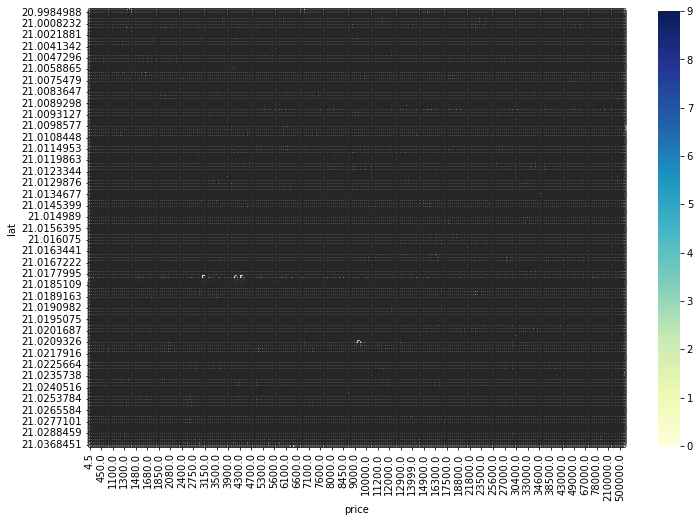

In [68]:
plt.figure(figsize=(12,8))

sns.heatmap(contigency, annot=True, cmap="YlGnBu")

# nhận xét:
+ nhìn vào biểu đồ heatmap ta nhận thấy các thuộc tính này không hề tương quan với nhau

In [45]:
from scipy.stats import chi2_contingency

In [69]:
# thực hiện kiểm định chi bình phương

c, p, dof, expected = chi2_contingency(contigency)

In [70]:
print('C:', c)
print('P:', p)
print('dof:', dof)
print('expected: ', expected)

C: 44796.54533870114
P: 5.0780882993345975e-18
dof: 42256
expected:  [[0.00324149 0.00324149 0.00324149 ... 0.00324149 0.00324149 0.00324149]
 [0.00162075 0.00162075 0.00162075 ... 0.00162075 0.00162075 0.00162075]
 [0.00324149 0.00324149 0.00324149 ... 0.00324149 0.00324149 0.00324149]
 ...
 [0.00486224 0.00486224 0.00486224 ... 0.00486224 0.00486224 0.00486224]
 [0.01944895 0.01944895 0.01944895 ... 0.01944895 0.01944895 0.01944895]
 [0.00162075 0.00162075 0.00162075 ... 0.00162075 0.00162075 0.00162075]]


# tiến hành kiểm định giả thiết
+ H0: các thuộc tính không có tương quan với nhau
+ H1: các thuộc tính có tương quan với nhau
+ với mức ý nghĩa: 0.05
+ p < apla => bác bỏ giả thiết H0 và chấp nhận giả thiết H1

kết luận: các thuộc tính không hề tương quan đến nhau

# Giữa thuộc tính land_certificate và property_type có tương quan với nhau

In [53]:
df3 = df[['land_certificate', 'property_type']]

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   land_certificate  369 non-null    object
 1   property_type     671 non-null    object
dtypes: object(2)
memory usage: 10.6+ KB


# Hãy  mã hóa lại thuộc tính giá nhà theo đơn vị (nghìn đồng/m2) và sắp xếp giá nhà thành 4 mức tương ứng với các khoảng tứ phân vị. Tiến hành kiểm định tương quan giữa biến giá nhà này với các biến tọa độ vị trí (lat, long)

In [58]:
# tiến hành tính các khoảng tứ phân vị của df
q1, q2, q3 = df.price.quantile(0.25), df.price.quantile(0.5), df.price.quantile(0.75)
def price_order(price):
    if price < q1:
        return 1
    elif (price>=q1) & (price <q2):
        return 2
    elif (price >= q2) & (price < q3):
        return 3
    else:
        return 4

In [59]:
df['price_ordinal'] = df.price.apply(price_order)
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,price_ordinal
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo,3
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,2
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,3
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo,1
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo,2


In [64]:
from scipy.stats import spearmanr
r, pvalue = spearmanr(df['lat'], df['price_ordinal'])

In [65]:
print('r:', r)
print('pvalue: ', pvalue)

r: 0.015118516451586999
pvalue:  0.6958584491304425


# tiến hành kiểm định:
 + với mức ý nghĩa: 0.05
 + H0: price và lat không có tương quan với nhau
 + H1: hai thuộc tính có tương quan với nhau
 + pvalue > 0.05 không đủ cơ sở đê bác bỏ H0